In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
from scipy import stats
from statsmodels.formula.api import ols

## Heights

Using the data from the class.

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/stanford-mse-125-2025/mse-125-2025-public/refs/heads/main/data/class_heights.csv")
data.columns = ["Time", "Gender", "Father", "Mother", "Child"]
data

,Time,Gender,Father,Mother,Child
0,2025/05/08 3:30:46 PM MDT,Male,73.00,70.0,74.00
1,2025/05/08 3:30:47 PM MDT,Male,67.00,60.0,65.00
2,2025/05/08 3:30:47 PM MDT,Female,76.00,72.0,72.00
3,2025/05/08 3:30:50 PM MDT,Female,69.00,65.0,62.00
4,2025/05/08 3:30:51 PM MDT,Male,70.00,70.0,73.00
...,...,...,...,...,...
57,2025/05/08 3:31:39 PM MDT,Male,75.00,65.0,73.00
58,2025/05/08 3:31:41 PM MDT,Female,69.00,63.0,65.00
59,2025/05/08 3:31:45 PM MDT,Female,76.70,69.6,68.00
60,2025/05/08 3:31:51 PM MDT,Female,68.11,61.0,64.96


In [3]:
model = ols("Child ~ Father", data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Child   R-squared:                       0.204
Model:                            OLS   Adj. R-squared:                  0.191
Method:                 Least Squares   F-statistic:                     15.36
Date:                Tue, 13 May 2025   Prob (F-statistic):           0.000230
Time:                        09:43:45   Log-Likelihood:                -180.78
No. Observations:                  62   AIC:                             365.6
Df Residuals:                      60   BIC:                             369.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     18.5774     12.524      1.483      0.143      -6.474      43.629
Father         0.6968      0.178      3.920      0.000       0.341       1.052
==============================================================================
Omnibus:                        1.945   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.378   Jarque-Bera (JB):                1.379
Skew:                          -0.120   Prob(JB):                        0.502
Kurtosis:                       2.310   Cond. No.                     1.53e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.53e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [4]:
model = ols("Child ~ Father + Mother", data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Child   R-squared:                       0.415
Model:                            OLS   Adj. R-squared:                  0.395
Method:                 Least Squares   F-statistic:                     20.89
Date:                Tue, 13 May 2025   Prob (F-statistic):           1.38e-07
Time:                        09:43:53   Log-Likelihood:                -171.26
No. Observations:                  62   AIC:                             348.5
Df Residuals:                      59   BIC:                             354.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0439     11.560     -0.004      0.997     -23.175      23.087
Father         0.3102      0.175      1.771      0.082      -0.040       0.661
Mother         0.7162      0.155      4.608      0.000       0.405       1.027
==============================================================================
Omnibus:                        1.385   Durbin-Watson:                   2.150
Prob(Omnibus):                  0.500   Jarque-Bera (JB):                1.408
Skew:                           0.295   Prob(JB):                        0.495
Kurtosis:                       2.555   Cond. No.                     2.21e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.21e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

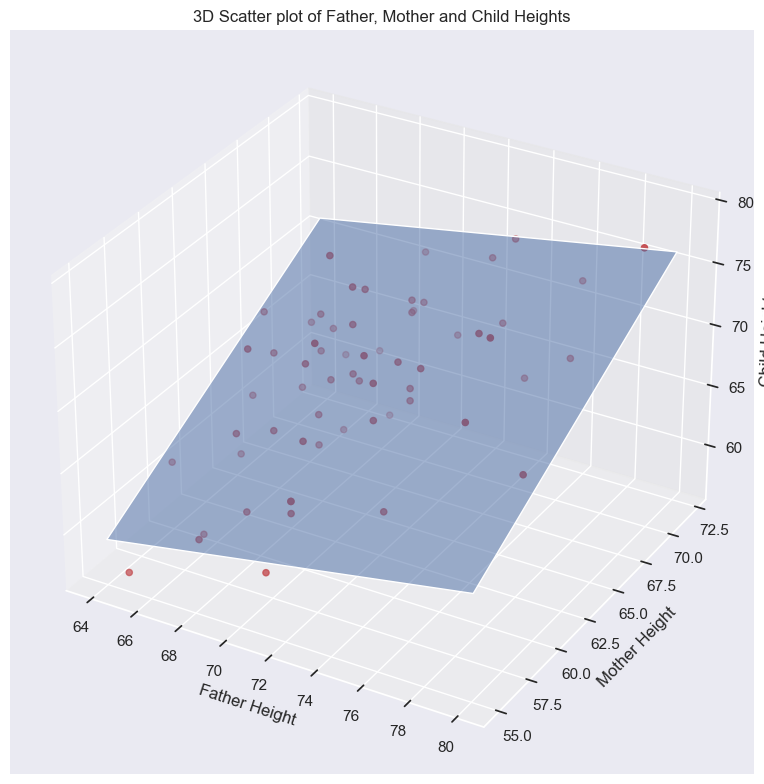

In [6]:
# Plot the plane in 3d space
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data["Father"], data["Mother"], data["Child"], c='r', marker='o')
ax.set_xlabel('Father Height')
ax.set_ylabel('Mother Height')
ax.set_zlabel('Child Height')
ax.set_title('3D Scatter plot of Father, Mother and Child Heights')

# Create a grid of points
father_range = np.linspace(data["Father"].min(), data["Father"].max(), 100)
mother_range = np.linspace(data["Mother"].min(), data["Mother"].max(), 100)
father_grid, mother_grid = np.meshgrid(father_range, mother_range)

# Predict child heights for the grid
predictions = model.predict(exog=dict(Father=father_grid.ravel(), Mother=mother_grid.ravel()))
predictions = predictions.values.reshape(father_grid.shape)

# Plot the surface
ax.plot_surface(father_grid, mother_grid, predictions, alpha=0.5, rstride=100, cstride=100, color='b')
plt.tight_layout()

In [13]:
# Get the MAE of both models
model = ols("Child ~ Father", data=data).fit()
mae_simple = np.mean(np.abs(data["Child"] - model.predict(data)))
print(f"MAE of simple model: {mae_simple:.2f}")

model = ols("Child ~ Father + Mother", data=data).fit()
mae_multiple = np.mean(np.abs(data["Child"] - model.predict(data)))
print(f"MAE of multiple model: {mae_multiple:.2f}")

MAE of simple model: 3.66
MAE of multiple model: 3.15


## Ames housing dataset

Goal: predict the price of houses in Ames, Iowa. 

Description of features: https://www.openml.org/search?type=data&sort=runs&id=42165&status=active

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/stanford-mse-125-2025/mse-125-2025-public/refs/heads/main/data/ames_housing.csv")
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [13]:
# Simple regression model

simple_model = ols("SalePrice ~ Q('1stFlrSF')", data=data).fit()
simple_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.367
Model:                            OLS   Adj. R-squared:                  0.367
Method:                 Least Squares   F-statistic:                     845.5
Date:                Wed, 14 May 2025   Prob (F-statistic):          5.39e-147
Time:                        16:08:54   Log-Likelihood:                -18210.
No. Observations:                1460   AIC:                         3.642e+04
Df Residuals:                    1458   BIC:                         3.643e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      3.617e+04   5245.728      6.896      0.000    2.59e+04    4.65e+04
Q('1stFlrSF')   124.5006      4.282     29.078      0.000     116.102     132.899
==============================================================================
Omnibus:                      373.497   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2669.199
Skew:                           0.997   Prob(JB):                         0.00
Kurtosis:                       9.317   Cond. No.                     3.88e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.88e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
# Model with categorical variables

data["GarageFinish"] = data["GarageFinish"].fillna("Abs")

model_with_cat = ols("SalePrice ~ Q('1stFlrSF') + GarageFinish", data=data).fit()
model_with_cat.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.503
Method:                 Least Squares   F-statistic:                     369.5
Date:                Wed, 14 May 2025   Prob (F-statistic):          1.25e-219
Time:                        16:09:06   Log-Likelihood:                -18032.
No. Observations:                1460   AIC:                         3.607e+04
Df Residuals:                    1455   BIC:                         3.610e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1.428e+04   7239.576      1.972      0.049      77.825    2.85e+04
GarageFinish[T.Fin]  9.679e+04   7101.182     13.631      0.000    8.29e+04    1.11e+05
GarageFinish[T.RFn]  6.716e+04   6922.331      9.702      0.000    5.36e+04    8.07e+04
GarageFinish[T.Unf]  2.618e+04   6650.268      3.936      0.000    1.31e+04    3.92e+04
Q('1stFlrSF')          97.2336      4.035     24.099      0.000      89.319     105.148
==============================================================================
Omnibus:                      479.315   Durbin-Watson:                   1.909
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4855.467
Skew:                           1.228   Prob(JB):                         0.00
Kurtosis:                      11.590   Cond. No.                     1.06e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
# Model with interaction term

model_with_interactions = ols("SalePrice ~ Q('1stFlrSF') * GarageFinish", data=data).fit()
model_with_interactions.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.510
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     215.7
Date:                Wed, 14 May 2025   Prob (F-statistic):          1.28e-219
Time:                        16:09:15   Log-Likelihood:                -18024.
No. Observations:                1460   AIC:                         3.606e+04
Df Residuals:                    1452   BIC:                         3.611e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                          4.187e+04   2.11e+04      1.986      0.047     524.805    8.32e+04
GarageFinish[T.Fin]                4.395e+04   2.28e+04      1.926      0.054    -821.976    8.87e+04
GarageFinish[T.RFn]                4.923e+04   2.33e+04      2.111      0.035    3494.151     9.5e+04
GarageFinish[T.Unf]                 1.68e+04   2.26e+04      0.742      0.458   -2.76e+04    6.12e+04
Q('1stFlrSF')                        67.1017     22.001      3.050      0.002      23.944     110.259
Q('1stFlrSF'):GarageFinish[T.Fin]    49.1689     22.861      2.151      0.032       4.326      94.012
Q('1stFlrSF'):GarageFinish[T.RFn]    22.3450     23.320      0.958      0.338     -23.399      68.089
Q('1stFlrSF'):GarageFinish[T.Unf]    12.7123     23.278      0.546      0.585     -32.950      58.375
==============================================================================
Omnibus:                      427.041   Durbin-Watson:                   1.903
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5854.655
Skew:                           0.969   Prob(JB):                         0.00
Kurtosis:                      12.617   Cond. No.                     4.13e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
# Use lasso to select features

from sklearn.linear_model import Lasso

model = Lasso(alpha=500)
X = data.drop(columns=["SalePrice"])
y = data["SalePrice"]

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer, make_column_selector

preprocessor = make_column_transformer(
    (make_pipeline(SimpleImputer(strategy="mean"), StandardScaler()), make_column_selector(dtype_include=["int64", "float64"])),
    (OneHotEncoder(handle_unknown="ignore", sparse_output=False), make_column_selector(dtype_include=["object"])),
    remainder="passthrough",
    verbose_feature_names_out=False,
).set_output(transform="pandas")
X = preprocessor.fit_transform(X)

model.fit(X, y)

# Print the selected features
selected_features = X.columns[model.coef_ != 0]
print("Number of selected features:", len(selected_features))

Number of selected features: 52


In [ ]:
# Model fit on lasso features
lasso_model = ols("SalePrice ~ " + " + ".join([f"Q('{f}')" for f in selected_features if "_" not in f]) + " + Q('1stFlrSF')", data=data).fit()
lasso_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     171.0
Date:                Thu, 15 May 2025   Prob (F-statistic):               0.00
Time:                        09:24:12   Log-Likelihood:                -13361.
No. Observations:                1121   AIC:                         2.678e+04
Df Residuals:                    1093   BIC:                         2.692e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -6.341e+05   1.67e+06     -0.380      0.704   -3.91e+06    2.64e+06
Q('Id')              -1.6392      2.648     -0.619      0.536      -6.834       3.556
Q('MSSubClass')    -201.9979     34.168     -5.912      0.000    -269.039    -134.956
Q('LotFrontage')   -129.2660     59.770     -2.163      0.031    -246.543     -11.989
Q('LotArea')          0.5549      0.156      3.554      0.000       0.249       0.861
Q('OverallQual')   1.868e+04   1459.755     12.794      0.000    1.58e+04    2.15e+04
Q('OverallCond')   5339.1244   1336.184      3.996      0.000    2717.349    7960.900
Q('YearBuilt')      304.0997     83.380      3.647      0.000     140.497     467.703
Q('YearRemodAdd')   112.3975     85.730      1.311      0.190     -55.816     280.611
Q('MasVnrArea')      32.7373      6.943      4.715      0.000      19.115      46.360
Q('BsmtFinSF1')      11.6449      3.683      3.162      0.002       4.418      18.872
Q('TotalBsmtSF')      4.7027      5.161      0.911      0.362      -5.423      14.829
Q('LowQualFinSF')   -16.5187     27.858     -0.593      0.553     -71.179      38.142
Q('GrLivArea')       45.0393      5.937      7.587      0.000      33.391      56.688
Q('BsmtFullBath')  9122.0270   2948.019      3.094      0.002    3337.611    1.49e+04
Q('FullBath')      5393.4615   3495.756      1.543      0.123   -1465.689    1.23e+04
Q('HalfBath')      -747.2753   3281.185     -0.228      0.820   -7185.409    5690.858
Q('BedroomAbvGr') -1.021e+04   2133.515     -4.785      0.000   -1.44e+04   -6021.674
Q('KitchenAbvGr') -2.249e+04   6675.290     -3.369      0.001   -3.56e+04   -9390.130
Q('TotRmsAbvGrd')  5618.8328   1469.484      3.824      0.000    2735.503    8502.162
Q('Fireplaces')    4204.9502   2169.017      1.939      0.053     -50.958    8460.858
Q('GarageYrBlt')    -36.2067     86.145     -0.420      0.674    -205.235     132.822
Q('GarageCars')    1.856e+04   2533.612      7.324      0.000    1.36e+04    2.35e+04
Q('WoodDeckSF')      21.6081      9.923      2.178      0.030       2.138      41.078
Q('3SsnPorch')       33.1751     37.339      0.888      0.374     -40.088     106.439
Q('ScreenPorch')     53.6900     19.860      2.703      0.007      14.723      92.657
Q('YrSold')         -90.3229    830.212     -0.109      0.913   -1719.312    1538.666
Q('1stFlrSF')         0.5943      6.644      0.089      0.929     -12.442      13.631
==============================================================================
Omnibus:                      483.943   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            68103.935
Skew:                          -0.917   Prob(JB):                         0.00
Kurtosis:                      41.141   Cond. No.                     2.05e+07
======================